# Motivation 


Intéressé par la finance, j'ai choisi d'étudier le système dynamique de Lorenz, connu pour son rôle central en théorie du chaos et ses connexions avec des domaines complexes comme la finance de marché. 
Mon objectif est d'approcher la solution de ce système à l'aide de la méthode des différences finies et d'explorer la méthode spectrale avec les polynômes de Chebychev. Bien que cette dernière soit plus couramment utilisée pour des EDP, ce projet représente néanmoins une opportunité pour moi d'approfondir cette nouvelle méthode qui est très utilisée pour approximer les solutions des systèmes chaotiques non linéaires, tels les marchés financiers.

# Le système dynamique de Lorenz 

Le système dynamique de Lorenz est défini par les équations différentielles suivantes :


\begin{aligned}
\frac{dx}{dt} &= \sigma (y - x), \\
\frac{dy}{dt} &= x (\rho - z) - y, \\
\frac{dz}{dt} &= x y - \beta z, 
\end{aligned}

où :
- $ \sigma $ est le paramètre de Prandtl,
- $ \rho $ est le nombre de Rayleigh divisé par le nombre de Rayleigh critique,
- $ \beta $ est un paramètre géométrique qui caractérise la géométrie de l'environnement.

En 1963, le météorologue Edward Lorenz fut le premier à révéler le caractère potentiellement chaotique de la météorologie. Le modèle de Lorenz constitue une simplification des phénomènes météorologiques basée sur les principes de la mécanique des fluides. Ce système dynamique tridimensionnel peut présenter un comportement chaotique dans certaines conditions. 

En 1972, Edward Lorenz donne une conférence scientifique intitulée: «Prédictibilité: le battement d’ailes d’un papillon au Brésil provoque-t-il une tornade au Texas ?» Cette métaphore est devenue extrêmement célèbre sous le nom d’« effet papillon ». Elle résume un phénomène fondamental entrevu par quelques mathématiciens avant Lorenz: la sensibilité aux conditions initiales du système. Toute variation, aussi imperceptible soit-elle, aboutit à une situation complètement différente de celle qui pouvait être calculée, ce qui explique que le comportement du système ne puisse être prédit sur le long terme (ou sa condition initiale déduite).   (Référence 2 : https://www.les-sciences.fr/sciences/lattracteur-de-lorenz-et-la-theorie-du-chaos/)

# Méthode des différences finies : Schéma de Runge-Kutta d'ordre 4 (RK4)

Importation des bibliothèques nécessaires à l'étude

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Définition du système de Lorenz : 

In [ ]:
def lorenz_deriv(t, xyz, sigma=10.0, rho=28.0, beta=8/3):
    """
    étant donné l'état [x, y, z], la fonction renvoie les dérivées [dx/dt, dy/dt, dz/dt]
    pour le système de Lorenz:
      dx/dt = sigma*(y - x)
      dy/dt = x*(rho - z) - y
      dz/dt = x*y - beta*z
    t: temps (n'est pas utilisé explicitement ici)
    sigma, rho, beta: paramètres
    """
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x*(rho - z) - y
    dzdt = x*y - beta*z
    return np.array([dxdt, dydt, dzdt])


Schéma de Runge-Kutta d'ordre 4 (RK4) 

In [ ]:
def rk4(f, t, xyz, dt, **kwargs):
    """
    (t, xyz) -> (t + dt, xyz_new).
    f: fonction f(t, xyz, **kwargs) -> dérivées
    kwargs : permet de renseigner les paramètres supplémentaires.
    """
    k1 = f(t,        xyz,               **kwargs)
    k2 = f(t+dt/2.0, xyz + 0.5*dt*k1,    **kwargs)
    k3 = f(t+dt/2.0, xyz + 0.5*dt*k2,    **kwargs)
    k4 = f(t+dt,     xyz +     dt*k3,    **kwargs)

    xyz_nouveau = xyz + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return xyz_nouveau

def rk4_lorenz(xyz0, t0, tf, dt, sigma=10.0, rho=28.0, beta=8/3):
    """
    intègre le système de Lorenz de t0 à tf avec dt comme pas, utilisant rk4.
    La fonction retourne : 
      t_vals: tableau de temps
      xyz_vals: tableau de taille (len(t_vals), 3) des valeurs (x,y,z).
    """
    n_steps = int(np.floor((tf - t0)/dt))
    t_vals = np.linspace(t0, tf, n_steps+1)
    
    xyz_vals = np.zeros((n_steps+1, 3))
    xyz_vals[0,:] = xyz0
    
    for i in range(n_steps):
        t = t_vals[i]
        xyz_current = xyz_vals[i,:]
        xyz_next = rk4(
            f=lorenz_deriv, 
            t=t, 
            xyz=xyz_current, 
            dt=dt,
            sigma=sigma, rho=rho, beta=beta
        )
        xyz_vals[i+1,:] = xyz_next
    
    return t_vals, xyz_vals


Affichage des coupes xy, yz et xz de la solution : 

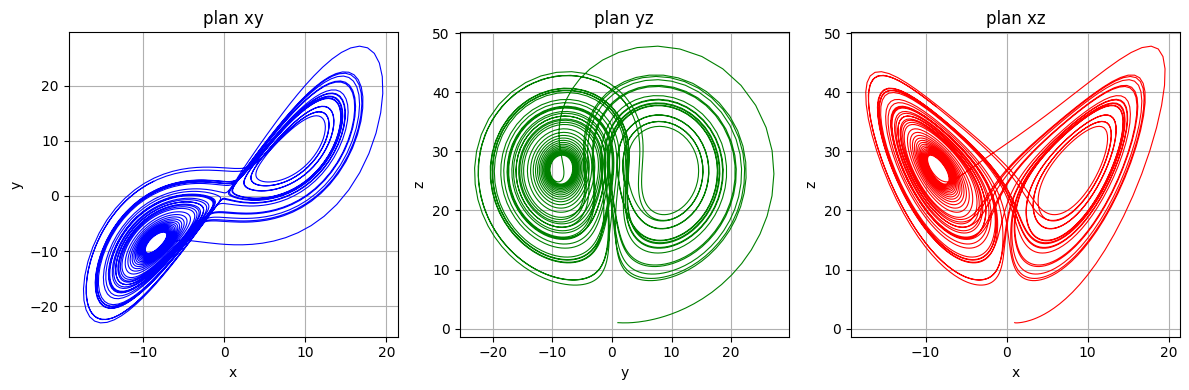

In [ ]:
if __name__ == "__main__":
    # Paramètres constants 
    sigma = 10.0
    rho   = 28.0
    beta  = 8.0/3.0
    
    # condition initiale choisie
    xyz0 = [1.0, 1.0, 1.0]  # =(x0, y0, z0)
    
    # intervalle de temps et pas
    t0 = 0.0
    tf = 40.0   # temps final
    dt = 0.01   # pas
    
    
    t_vals, sol = rk4_lorenz(
        xyz0, t0, tf, dt, 
        sigma=sigma, rho=rho, beta=beta
    )
    
    # extraction de x,y et z 
    x_vals = sol[:,0]
    y_vals = sol[:,1]
    z_vals = sol[:,2]
    
    # Plot projections 2D (x,y), (y,z), (x,z), (comme dans l'article)
    fig = plt.figure(figsize=(12,4))
    
    # plan XY
    ax1 = fig.add_subplot(1,3,1)
    ax1.plot(x_vals, y_vals, 'b-', linewidth=0.8)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('plan xy')
    plt.grid()
    
    # plan YZ
    ax2 = fig.add_subplot(1,3,2)
    ax2.plot(y_vals, z_vals, 'g-', linewidth=0.8)
    ax2.set_xlabel('y')
    ax2.set_ylabel('z')
    ax2.set_title('plan yz')
    plt.grid()
    
    # plan XZ
    ax3 = fig.add_subplot(1,3,3)
    ax3.plot(x_vals, z_vals, 'r-', linewidth=0.8)
    ax3.set_xlabel('x')
    ax3.set_ylabel('z')
    ax3.set_title('plan xz')
    
    plt.tight_layout()
    plt.grid()
    plt.show()

### **Caractère chaotique du système :**

Le système de Lorenz est un système chaotique. Un changement minime dans les conditions initiales produit deux trajectoires très différentes. 
Exemple avec 
(x_0, y_0, z_0) = (1,1,1) puis avec (x_0, y_0, z_0) = (1.01,1,1) :

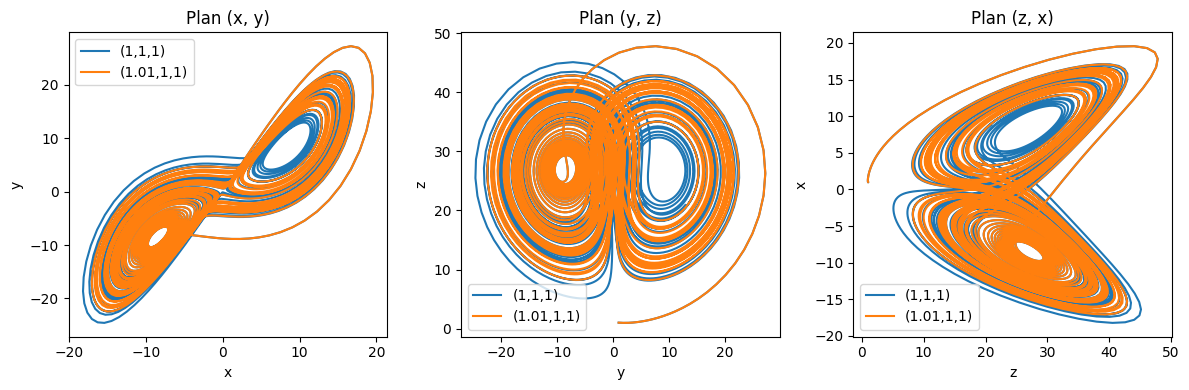

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz(t, Y, sigma=10.0, rho=28.0, beta=8.0/3.0):
    
    x, y, z = Y
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])


def rk4(f, t0, y0, t_end, h, **kwargs):

    n_steps = int(np.ceil((t_end - t0) / h))
    t_values = np.zeros(n_steps + 1)
    y_values = np.zeros((n_steps + 1, len(y0)))
    
    # Initialisation
    t_values[0] = t0
    y_values[0] = y0
    
    for i in range(n_steps):
        t = t_values[i]
        y = y_values[i]
        
        k1 = f(t, y, **kwargs)
        k2 = f(t + 0.5*h, y + 0.5*h*k1, **kwargs)
        k3 = f(t + 0.5*h, y + 0.5*h*k2, **kwargs)
        k4 = f(t + h,    y + h*k3,     **kwargs)
        
        y_values[i+1] = y + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
        t_values[i+1] = t + h
    
    return t_values, y_values


def main():
    
    t0 = 0.0
    t_end = 50.0
    h = 0.01
    sigma = 10.0
    rho = 28.0
    beta = 8.0/3.0
    
    y0_1 = np.array([1.0, 1.0, 1.0]) #condition initiale 1
    y0_2 = np.array([1.01, 1.0, 1.0]) #condition initiale 2 
    
  
    t_vals1, sol1 = rk4(lorenz, t0, y0_1, t_end, h, sigma=sigma, rho=rho, beta=beta)
    t_vals2, sol2 = rk4(lorenz, t0, y0_2, t_end, h, sigma=sigma, rho=rho, beta=beta)
    
   
    x1, y1, z1 = sol1[:,0], sol1[:,1], sol1[:,2]
    x2, y2, z2 = sol2[:,0], sol2[:,1], sol2[:,2]
    

    fig = plt.figure(figsize=(12, 4))
    
    # (x, y)
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.plot(x1, y1, label='(1,1,1)')
    ax1.plot(x2, y2, label='(1.01,1,1)')
    ax1.set_title("Plan (x, y)")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.legend()
    
    # (y, z)
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.plot(y1, z1, label='(1,1,1)')
    ax2.plot(y2, z2, label='(1.01,1,1)')
    ax2.set_title("Plan (y, z)")
    ax2.set_xlabel("y")
    ax2.set_ylabel("z")
    ax2.legend()
    
    # (z, x)
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.plot(z1, x1, label='(1,1,1)')
    ax3.plot(z2, x2, label='(1.01,1,1)')
    ax3.set_title("Plan (z, x)")
    ax3.set_xlabel("z")
    ax3.set_ylabel("x")
    ax3.legend()
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

**Spoiler Alert**
 
Ce caractère chaotique fait que la méthode spectrale peut ne pas converger, comme nous le verrons ci-dessous, et nous pousse à considérer une méthode specrale << robuste >>.

# Exploration de la méthode spectrale :

**Intérêt**

Les méthodes spectrales jouent un rôle fondamental dans l'étude des systèmes chaotiques non linéaires en offrant une approche rigoureuse pour analyser leurs dynamiques complexes. Contrairement aux méthodes classiques d’intégration numérique, les méthodes spectrales exploitent des bases orthogonales, comme les polynômes de Chebyshev ou les harmoniques de Fourier, pour représenter les solutions avec une grande précision. Dans le cas des systèmes chaotiques, où la sensibilité aux conditions initiales rend les prédictions à long terme extrêmement difficiles, ces méthodes permettent d’identifier les structures sous-jacentes du chaos, de filtrer le bruit et de mieux comprendre les phénomènes d’instabilité. Elles sont particulièrement utiles pour détecter des régularités cachées, analyser les attracteurs chaotiques et développer des stratégies de contrôle afin de stabiliser le système ou de prévenir des comportements indésirables.



**Important**

En raison de la non-périodicité des conditions aux bords de la solution du système de Lorenz (chaotique), la méthode spectrale basée sur les harmoniques de Fourier (FFT) n'est pas applicable. 
Nous nous baserons donc sur les pôlynomes de Chebychev, qui n'exigent pas le critère de périodicité, dans notre méthode spectrale.

**Spoiler Alert**

Nous allons voir que cette méthode ne converge pas, raison pour laquelle on l'améliorera en envisageant la méthode spectrale robuste (RSM), en décomposant l'intervalle de temps en plusieurs sous-intervalles.

### **Polynômes de Chebyshev de première espèce**  

#### **Définition** :

Le **polynôme de Chebyshev** de première espèce $T_n(x) est un polynôme défini sur l'intervalle $[-1,1] et de degré $n > 0. Il est donné par la relation :  

$$
T_n(x) = \cos(n\theta), \quad \text{avec } x = \cos\theta
$$

c'est-à-dire :

$$
T_n(x) = \cos(n \arccos(x)).
$$

Il est important de noter que la définition des polynômes de Chebyshev peut être facilement étendue à n'importe quel intervalle \( [a,b] \) en appliquant un **changement d'échelle** défini par la transformation :

$$
s : x \mapsto s(x) = \frac{2}{b-a} x - \frac{b+a}{b-a}.
$$

C'est pourquoi, par simplicité, nous travaillons généralement sur l'intervalle \( [-1,1] \). Il suffit ensuite d'appliquer la transformation inverse pour retrouver les polynômes sur un intervalle arbitraire \( [a,b] \).

#### **Visualisation pour différents n** :

In [2]:
import ipywidgets as widgets
from IPython.display import display
from scipy.special import eval_chebyt
import numpy as np  
import matplotlib.pyplot as plt 

In [4]:
def plot_chebyshev(n):
    x = np.linspace(-1, 1, 400)
    plt.figure(figsize=(8, 5))
    
    # Tracer les polynômes de degré 0 à n
    for k in range(n + 1):
        plt.plot(x, eval_chebyt(k, x), label=f"$T_{k}(x)$")
    
    plt.xlabel("$x$")
    plt.ylabel("$T_n(x)$")
    plt.title(f"Polynômes de Chebyshev de première espèce jusqu'à $T_{n}(x)$")
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show()

Glisser le bouton intéractif pour visualiser pour différents n :

In [ ]:
slider_n = widgets.IntSlider(value=3, min=1, max=10, step=1, description="n")
widgets.interactive(plot_chebyshev, n=slider_n)

interactive(children=(IntSlider(value=3, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

#### **Propriétés utiles des pôlynomes de Chebychev**

#### 1 - Relation de récurrence et forme matricielle des polynômes de Chebyshev

À partir de la relation trigonométrique suivante :

$$
\cos(n\theta) + \cos((n-2)\theta) = 2 \cos\theta \cos((n-1)\theta),
$$

on obtient la définition des premiers polynômes de Chebyshev de première espèce :

$$
T_0(x) = 1, \quad 
$$

$$
T_1(x) = x, \quad 
$$

$$
T_n(x) = 2x T_{n-1}(x) - T_{n-2}(x), \quad \text{pour } n = 2,3,\dots  \quad 
$$

Cette relation peut également être exprimée sous **forme matricielle** :

$$
\begin{bmatrix}
1 & 2x & -1 & 0 & 0 & \dots & 0 \\
0 & 1 & 2x & -1 & 0 & \dots & 0 \\
0 & 0 & 1 & 2x & -1 & \dots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & 1 & 2x & -1
\end{bmatrix}
\begin{bmatrix}
T_0(x) \\
T_1(x) \\
T_2(x) \\
\vdots \\
T_n(x)
\end{bmatrix}
=
\begin{bmatrix}
1 \\
x \\
0 \\
\vdots \\
0
\end{bmatrix}
$$

#### 2 - Racines du pôlynome et points de collocation 

Les **zéros** du polynôme de Chebyshev \( T_n(x) \) sont donnés par :  

$$
x_k = \cos \left( \frac{(k - 1/2) \pi}{n} \right), \quad k = 1,2,\dots,n.  \quad 
$$

L'ensemble \( \{ x_k \}_k \) est appelé **points de collocation**, aussi connus sous le nom de **points de Chebyshev de première espèce**.

Pour tout point \( x \), l'ensemble \( \{ T_0(x), T_1(x), \dots \} \) forme une **base orthogonale** selon le produit scalaire pondéré défini par :

$$
\langle f, g \rangle =
\int_{-1}^{1} f(x) g(x) \sqrt{1 - x^2} \, dx, \quad 
$$

pour toute fonction continue \( f, g \) définie sur \( [-1,1] \).

Cela signifie que pour tout **polynôme** de degré \( n > 0 \), il existe un **ensemble unique de coefficients** \( \{ c_0, c_1, \dots, c_n \} \) tel que :

$$
p_n(x) = \sum_{k=0}^{n} c_k T_k(x).
$$


Étant donné que les polynômes sont denses dans \$C([−1,1]) et que l'ensemble des polynômes de Chebyshev est complet, nous pouvons en déduire le théorème suivant.

**Théorème 3.1.**  
Soit $u$ une fonction lipschitzienne sur l'intervalle $[-1,1]$. Alors $u$ admet une représentation unique sous la forme de la série :

$$
u(x) = \frac{c_0}{2} + \sum_{k=1}^{\infty} c_k T_k(x),
$$

où $T_k(x)$ sont les polynômes de Chebyshev, et les coefficients sont donnés par :

$$
c_k = \frac{2}{\pi} \int_{-1}^{1} u(x) T_k(x) \sqrt{1 - x^2} \, dx, \quad k = 0,1,2,3,\dots
$$

Cette série converge uniformément et absolument.

### **Principe de la résolution spectrale** : 

Une **approximation de Chebyshev** d'ordre \( n > 0 \) d'une fonction \( u \) continue sur l'intervalle \( [-1,1] \) est définie par :

$$
u_n(x) = \sum_{k=0}^{n} c_k T_k(x), \quad 
$$

ce qui peut s'écrire sous forme matricielle :

$$
u_n(x) = \underline{c}^T T(x), \quad 
$$

où \( \underline{c} = (c_0, c_1, \dots, c_n) \) est le **vecteur des coefficients** associé à l'approximation \( u_n \), appellé la **représentation spectrale** de \( u_n \).


Pour souci de simplification, nous écrirons \( u(x) \) au lieu de \( u_n(x) \) pour désigner l'approximation de Chebyshev d'ordre \( n \) de \( u \) en \( x \).

**L'objectif de la méthode est donc de déterminer les résolutions spectrales de x,y et z (inconnues du système de Lorenz)** . Pour cela, nous disposons de plusieurs propriétés utiles concernant les représentations spectrales.

### **Propriétés utiles des représentations spectrales**

### 1 - Représentation spectrale du produit de deux fonctions :

Considérons deux fonctions \( a(x) \) et \( u(x) \) ayant respectivement pour représentation spectrale les vecteurs \( \underline{a} \) et \( \underline{c} \).  
Le produit \( a(x) u(x) \) admet également une **représentation spectrale**, notée \( \underline{\varphi} \), qui est définie par :

$$
\underline{\varphi} = \underline{a} \cdot \underline{c}, \quad 
$$

où \( \underline{a} \) est la **matrice de représentation** de la fonction \( a(x) \) et \( \underline{c} \) est la **représentation spectrale** de la fonction \( u(x) \).

Une manière efficace d'obtenir la matrice \( A \) est d'écrire le produit sous forme discrète.  
Étant donné que :

$$
a(x) u(x) = \left[ \sum_{k=0}^{n} a_k T_k(x) \right] \left[ \sum_{k=0}^{n} c_k T_k(x) \right], \quad 
$$

nous avons alors :

$$
\sum_{k=0}^{n} \varphi_k T_k(x) =
\sum_{k=0}^{n} \sum_{l=0}^{n} a_k a_l c_l T_k T_l, \quad 
$$

pour certains coefficients \( a_{kl} \) avec \( 0 \leq k,l \leq n \).

De plus, en utilisant la propriété suivante vérifiée par les pôlynomes de Chebychev : 

$$
T_k(x) T_l(x) = \frac{1}{2} \left[ T_{k+l}(x) + T_{|k-l|}(x) \right], \quad \forall k,l = 0,1,\dots,n,  \quad 
$$

et en réorganisant correctement les termes, on aboutit à l'existence d'une **matrice** \( A \) telle que :

$$
\sum_{k=0}^{n} \varphi_k T_k(x) =
\sum_{k=0}^{n} \sum_{l=0}^{n} a_{kl} c_l T_k(x).
$$


La fonction suivante, aussi appellée **convolution de Chebychev** permet de retourner la représentation spectrale du produit de deux fonctions, étant donné leurs représentations respectives.

In [6]:
def cheb_convolution(a,b):
    N = len(a)-1
    out = np.zeros(N+1)
    for k in range(N+1):
        val=0.
        for i in range(N+1):
            for j in range(N+1):
                if i+j==k:
                    val+=0.5*a[i]*b[j]
                if abs(i-j)==k:
                    val+=0.5*a[i]*b[j]
        out[k]=val
    return out

Notons que nous tronquons le vecteur de sortie de sorte à ce qu'il soit de taille N+1, sachant que le produit fournit une taille 2*(N+1). 
Ceci constitue une source d'erreurs.

### 2 - Représentation spectrale des dérivées successives d'une fonction 

La dérivée \( u'(x) \) est donnée par :

$$
u'(x) = \sum_{k=0}^{n} c_k T'_k(x), \quad 
$$

La dérivations des relations ( réf à ajouter cf relation de récurrence propriété chebychev) implique :

$$
T'_0(x) = T'_1(x), \quad 
$$

$$
T'_1(x) = \frac{T'_2(x)}{2}, \quad 
$$

$$
T'_{n+1}(x) = n T'_{n-1}(x) - 2(1 - x^2) T'_n(x), \quad 
$$

c'est-à-dire :

$$
T'_n(x) = \frac{T'_{n+1}(x)}{2(n+1)} - \frac{T'_{n-1}(x)}{2(n-1)}, \quad n = 2,3,\dots \quad 
$$

En insérant cette relation dans ci-dessus, on montre l'existence d'une **matrice** \( D = (d_{kl})_{0 \leq k,l \leq n} \) telle que :

$$
\sum_{k=0}^{n} c'_k T_k(x) = \sum_{k=0}^{n} \sum_{l=0}^{n} d_{kl} c_l T_k(x), \quad 
$$

c'est-à-dire sous **forme matricielle** :

$$
\underline{c'} = D \underline{c}.
$$

Cette matrice D, de taille \( (n+1) \times (n+1) \), est appellée **la matrice de dérivation de Chebychev** et est définie par :

$$
D_{ij} =
\begin{cases}
\frac{2n^2+1}{6}, & \text{si } i = j = 0, \\
-\frac{2n^2+1}{6}, & \text{si } i = j = n, \\
-\frac{x_i}{2(1 - x_i^2)}, & \text{si } i = j, \quad 1 \leq i \leq n-1, \\
\frac{c_i}{c_j} \frac{(-1)^{i+j}}{x_i - x_j}, & \text{si } i \neq j.
\end{cases}
$$

avec :

$$
c_0 = c_n = 2, \quad c_k = 1 \quad \text{pour } 1 \leq k \leq n-1.
$$

En appliquant le résultat précédent de manière récursive, nous obtenons la **représentation spectrale**  de la dérivée d'ordre \( p \) de \( u \), donnée par :

$$
\underline{c}^{(p)} = D^p \underline{c}.
$$

In [8]:
def chebyshev_derivative_matrix(n):
    """
    Calcule la matrice de dérivation de Chebyshev de taille (n+1) x (n+1)
    """
    x = np.cos(np.pi * np.arange(n+1) / n) #points de collocation
    
    c = np.ones(n+1)
    c[0] = 2
    c[-1] = 2
    
    
    D = np.zeros((n+1, n+1))
    
    for i in range(n+1):
        for j in range(n+1):
            if i != j:
                D[i, j] = (c[i] / c[j]) * (-1)**(i+j) / (x[i] - x[j])
            else:
                if i == 0:
                    D[i, j] = (2 * n**2 + 1) / 6
                elif i == n:
                    D[i, j] = -(2 * n**2 + 1) / 6
                else:
                    D[i, j] = -x[i] / (2 * (1 - x[i]**2))

    return D

# Exemple : calcul de la matrice pour n = 5
n = 5
D = chebyshev_derivative_matrix(n)
print("Matrice de dérivation de Chebyshev pour n =", n)
print(D)

Matrice de dérivation de Chebyshev pour n = 5
[[  8.5        -10.47213595   2.89442719  -1.52786405   1.10557281
   -0.5       ]
 [  2.61803399  -1.17082039  -2.           0.89442719  -0.61803399
    0.2763932 ]
 [ -0.7236068    2.          -0.17082039  -1.61803399   0.89442719
   -0.38196601]
 [  0.38196601  -0.89442719   1.61803399   0.17082039  -2.
    0.7236068 ]
 [ -0.2763932    0.61803399  -0.89442719   2.           1.17082039
   -2.61803399]
 [  0.5         -1.10557281   1.52786405  -2.89442719  10.47213595
   -8.5       ]]


### 3 - Représentation spectrale des intégrales successives d'une fonction 

Dans le cas de l'intégration, nous rappelons la relation :

$$
T_{n+1}(x) = n T_{n-1}(x) - 2(1 - x^2) T_n(x), \quad 
$$

L'intégrale d'un polynôme de Chebyshev est donnée par :

$$
\int T_n(x) \,dx = \frac{1}{2} \left( \frac{T_{n+1}(x)}{n+1} - \frac{T_{n-1}(x)}{n-1} \right), \quad n = 2,3,\dots \quad 
$$

Les cas particuliers pour \( n = 0,1 \) sont :

$$
\int T_1(x) \,dx = \frac{1}{4} T_2(x), \quad 
$$

$$
\int T_0(x) \,dx = \frac{1}{2} T_1(x). \quad 
$$

Comme opérateur linéaire, l'intégrale de \( u(x) \) est également une fonction **continue et lipschitzienne** sur \( [-1,1] \), admettant une **expansion unique** sous la forme :

$$
\int u(x) \,dx = \sum_{k=0}^{n} I_k T_k(x), \quad x \in [a,b],
$$

où les \( I_k \) sont les coefficients de l'intégrale de \( u(x) \).  
De manière similaire à la différentiation, il existe une **matrice \( J \)** telle que :

$$
I_k = \sum_{l=0}^{n} J_{kl} c_l, \quad 
$$

ou plus simplement sous forme **matricielle** :

$$
\underline{I} = J \underline{c}, \quad 
$$

où \( \underline{I} \) est la **représentation spectrale** de l'intégrale de \( u(x) \).

L'intégrale de \( u(x) \) s'écrit également sous la forme :

$$
\int u(x) \,dx = \int \sum_{k=0}^{N-1} c_k T_k(x) \,dx.
$$

Ce qui donne :

$$
\sum_{k=0}^{N-1} I_k T_k(x) = \int \sum_{k=0}^{N-1} c_k T_k(x) \,dx
= \sum_{k=0}^{N-1} c_k \int T_k(x) \,dx.
$$

En utilisant la relation d'intégration des polynômes de Chebyshev, on obtient :

$$
\sum_{k=0}^{N-1} \sum_{j=2}^{N-1} J_{kj} c_j T_k(x) =
\sum_{k=2}^{n} \frac{c_{k-1}}{2} \left( \frac{T_{k+1}}{k+1} - \frac{T_{k-1}}{k-1} \right).
$$

Avec le calcul, on retrouve la **matrice d'intégration de Chebychev**, de taille (N+1)x(N+1), définie par : 

$$
J_{ij} =
\begin{cases}
\frac{1}{2(i+1)}, & \text{si } j = i + 1, \\
-\frac{1}{2(i-1)}, & \text{si } j = i - 1, \quad i \geq 2, \\
0, & \text{sinon}.
\end{cases}
$$

avec :

$$
J_{1,2} = \frac{1}{4}, \quad J_{0,1} = \frac{1}{2}.
$$

In [9]:
def chebyshev_integration_matrix(n):
    """
    Calcule la matrice d'intégration de Chebyshev de taille (n+1) x (n+1)
    """
    J = np.zeros((n+1, n+1))

    for i in range(n+1):
        if i + 1 <= n:
            J[i, i+1] = 1 / (2 * (i+1))
        if i - 1 >= 1:
            J[i, i-1] = -1 / (2 * (i-1))
    
    # Cas particuliers pour les premiers éléments
    if n > 0:
        J[1,2] = 1/4
        J[0,1] = 1/2

    return J

# Exemple : calcul de la matrice pour n = 5
n = 5
J = chebyshev_integration_matrix(n)
print("Matrice d'intégration de Chebyshev pour n =", n)
print(J)

Matrice d'intégration de Chebyshev pour n = 5
[[ 0.          0.5         0.          0.          0.          0.        ]
 [ 0.          0.          0.25        0.          0.          0.        ]
 [ 0.         -0.5         0.          0.16666667  0.          0.        ]
 [ 0.          0.         -0.25        0.          0.125       0.        ]
 [ 0.          0.          0.         -0.16666667  0.          0.1       ]
 [ 0.          0.          0.          0.         -0.125       0.        ]]


### 4 - Représentation spectrale d'un opérateur linéaire 


**NB** : Pour un opérateur linéaire, la représentation spectrale est une matrice carrée, ici de taille (N+1)x(N+1) et non un vecteur. La représentation spectrale de L(f) où f est une fonction quelconque est donc le produit des représentations matricielles de L et de f (vecteur).

Soit \( L \) un opérateur linéaire quelconque tel que :

$$
L u(x) = \sum_{i=0}^{m} a_i(x) \frac{d^i u}{dx^i} (x)
$$

En intégrant plusieurs fois, nous obtenons :

$$
\int \dots \int L u(x) \, dx^m = \sum_{i=0}^{m} J^m_i (I - JD) a_i + c
$$

où la matrice

$$
A = \sum_{i=0}^{m} J^m_i (I - JD) a_i
$$

est la représentation spectrale de l'opérateur intégral associé à \( L \)

## **Mise en place de la méthode spectrale**

### Principe général de la mise en place : 

Soit une équation différentielle générale d'ordre $m$ de la forme :

$$
A u = f
$$

où l'opérateur différentiel peut être décomposé en une partie linéaire et une partie non linéaire :

$$
A = L + N
$$

Ainsi, l’équation différentielle peut s’écrire sous la forme :

$$
L u(t) + N u(t) = f(t) 
$$

ou encore :

$$
L u(t) = N u(t) + f(t) 
$$

En intégrant plusieurs fois :

$$
\int \dots \int L u(t) \rightarrow A \underline{c} = \mathbf{n} + J^m \mathbf{f}
$$

ce qui implique :

$$
A \underline{c} = \mathbf{f}
$$

d’où la relation :

$$
\underline{c} = A^{-1} \mathbf{f}
$$

où **$\mathbf{n}$** est la représentation spectrale de l'intégrale de $N u$ à l'ordre $m$, et **$\mathbf{f} = \mathbf{n} + J^m \underline{f}$** est la représentation spectrale de $-N(u) + f(t)$.

La méthode utilisée s'inspire de la méthode du point fixe :

On commence par donner une solution initiale $u_0$, et initialiser l'opérateur linéaire $L$. On évalue ensuite la partie non linéaire $N$ et la fonction $f$ en $u_0$. À partir de ces valeurs, on calcule $u$ en appliquant l’opérateur inverse de $L$ à la somme $N + f$ :

$$
u = L^{-1} (N + f)
$$

Ensuite, une boucle itérative est mise en place. Tant que la norme de la différence $|| u - u_0 ||$ est supérieure à un seuil donné, on met à jour $u_0$ avec la valeur actuelle de $u$, puis on réévalue $N$ et $f$ en $u_0$. On recalcule alors $u$ selon la même relation :

$$
u = L^{-1} (N + f)
$$


Ou bien : il y a recourt à un solveur de systèmes d'équations une fois la méthode mise en place.

# Dans notre cas : système de Lorenz 

### Décomposition du système de Lorenz

Le **système de Lorenz** classique s'écrit sous la forme :

\[
\begin{cases}
\dot{x} = \sigma (y - x), \\
\dot{y} = x (\rho - z) - y, \\
\dot{z} = x y - \beta z.
\end{cases}
\]


On peut réécrire ce système sous la forme :

$$
\frac{d}{dt} 
\begin{pmatrix} x \\ y \\ z \end{pmatrix}
=
L \begin{pmatrix} x \\ y \\ z \end{pmatrix}
+ N(x, y, z),
$$

où :

- $L$ est l'opérateur **linéaire**,
- $N(x,y,z)$ est l'opérateur **non linéaire**, qui contient les termes $xy$ et $xz$.

La **matrice linéaire** $L$ est donnée par :

$$
L =
\begin{pmatrix}
-\sigma & \sigma & 0 \\
\rho & -1 & 0 \\
0 & 0 & -\beta
\end{pmatrix}.
$$

Elle agit sur le vecteur $\begin{pmatrix} x \\ y \\ z \end{pmatrix}$ pour donner la contribution linéaire :

$$
L \begin{pmatrix} x \\ y \\ z \end{pmatrix} =
\begin{pmatrix} 
-\sigma x + \sigma y \\ 
\rho x - y \\ 
-\beta z
\end{pmatrix}.
$$

#### **En pratique** : 

Nous allons décomposer $L$ en $(L_1(x),L_2(y),L_3(z))$. Dans notre cas :  
$$
L_1(x) =
\begin{pmatrix}
-\sigma & 0 & 0 \\
\rho & 0 & 0 \\
0 & 0 & 0
\end{pmatrix},
\quad
L_2(y) =
\begin{pmatrix}
0 & \sigma & 0 \\
0 & -1 & 0 \\
0 & 0 & 0
\end{pmatrix},
\quad
L_3(z) =
\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & -\beta
\end{pmatrix}.
$$  

On retrouvera ainsi les représentations spectrales $A_1$, $A_2$ et $A_3$ respectifs de $L_1(x)$, $L_2(y)$ et de $L_3(z)$ avec la formule :

$$
A_j = \sum_{i=0}^{1} J^1_i (I - JD) a_i
$$

Le système comportant les trois équations en parallèle, on aura comme représentation spectrale de l'opérateur global $L$ :

$$
L = \operatorname{diag}(A_1, A_2, A_3)
$$

de dimension $3(N+1)$.


L'opérateur **non linéaire** $N(x,y,z)$, lui, est défini par :

$$
N(x, y, z) =
\begin{pmatrix} 
0 \\ 
- x z \\ 
x y
\end{pmatrix}.
$$

où se concentrent les produits de variables $xz$ et $xy$.


#### **En pratique**

Vu que $N$ n'est pas linéaire, il n'existe pas de matrice unique qui représente $N$ comme c'est le cas des opérateurs linéaires.  
On fait plutôt des convolutions en base de Chebychev pour composer les produits $xy$ et $xz$.  

On décomposera $N$ en $(N_x, N_y, N_z)$, calculerons $N_x$, $N_y$ et $N_z$ avec la fonction de convolution et en les tronquant à la dimension $N+1$, puis concaténerons $(J @ N_x, J @ N_y, J @ N_z)$ pour enfin obtenir une approximation de la représentation matricielle $\underline{n}$ de l'opérateur $N$.


## Outils utilisés : 

- la fonction **convolution** de Chebychev pour calculer N 
- une fonction **concaténer** qui rassemble les représentations spectrales de x,y et z dans un seul vecteur de taille 3(N+1)
- une fonction **extract** qui soustrait les représentations spectrales de x,y et z depuis le vecteur de dimension 3(N+1)

**Je suis ici**

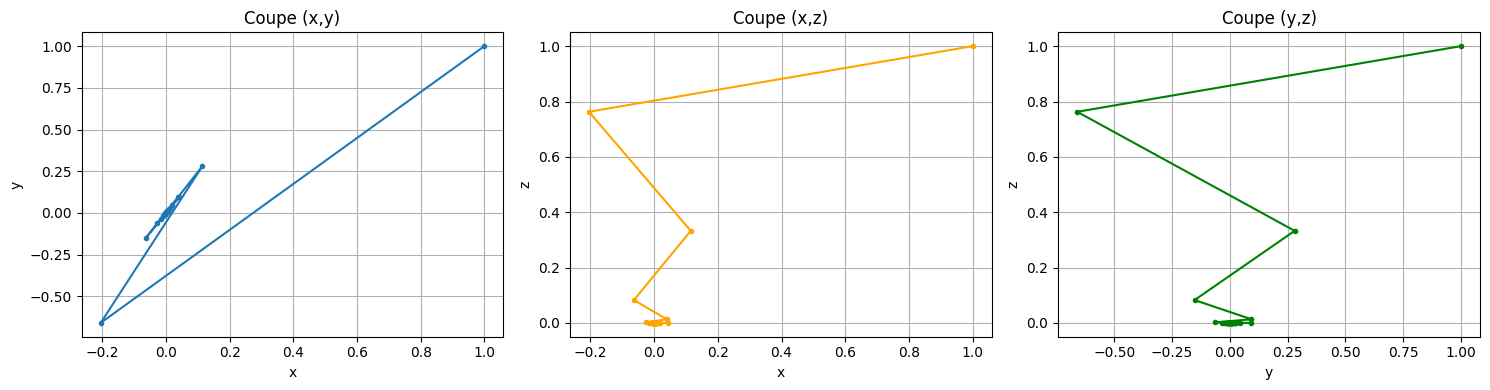

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# ---------------------------------------------------------------------
# 1) Construction des points de Chebyshev-Gauss-Lobatto sur [0, T]
#    et de la matrice de dérivation spectrale associée.
# ---------------------------------------------------------------------
def cheb_points_and_D(N, T):
    """
    Construit les points de collocation de Chebyshev-Gauss-Lobatto sur [0, T]
    et la matrice de dérivation spectrale D adaptée à [0, T].
    
    Paramètres
    ----------
    N : int
        Degré de la méthode (il y aura N+1 points de collocation).
    T : float
        Intervalle de temps [0, T].
    
    Retourne
    -------
    tau : ndarray shape (N+1,)
        Les abscisses de collocation (en ordre croissant).
    D : ndarray shape (N+1, N+1)
        La matrice de dérivation spectrale, telle que (D @ U) approx. dU/dt.
    """
    # Points x_j dans [-1, 1]
    j = np.arange(N+1)
    x = np.cos(np.pi * j / N)  # Chebyshev-Gauss-Lobatto standard

    # Transformation linéaire vers [0, T].
    # On choisit tau_j = (T/2)*(1 - x_j), ce qui inverse l'ordre pour que tau[0] = 0.
    tau = (T/2)*(1 - x)  # tau en ordre décroissant si x est croissant en j
    # Pour avoir tau en ordre *croissant*, on fera un "flip" plus bas.

    # Construction de la matrice de dérivation D sur [-1, 1] (formule classique)
    D_cheb = np.zeros((N+1, N+1))
    c = np.ones(N+1)
    c[0]  = 2
    c[-1] = 2

    for p in range(N+1):
        for q in range(N+1):
            if p != q:
                D_cheb[p, q] = (c[p]/c[q]) * ((-1)**(p+q)) / (x[p] - x[q])
            else:
                # Diagonale: cas particulier
                if p == 0:
                    D_cheb[p, p] = (2*N**2 + 1)/6.0
                elif p == N:
                    D_cheb[p, p] = -(2*N**2 + 1)/6.0
                else:
                    D_cheb[p, p] = - x[p]/(2*(1 - x[p]**2))
    
    # Adaptation pour [0, T].
    # d/dt = (2/T) * d/dx => D(tau) = (2/T) * D_cheb.
    D_temp = (2.0 / T) * D_cheb

    # On inverse l'ordre des points pour tau croissant, et on réordonne la matrice en conséquence.
    #   tau[::-1] renverse le tableau; pour la matrice, il faut permuter lignes et colonnes.
    idx = np.arange(N+1)[::-1]
    tau_ord = tau[idx]
    D_ord   = D_temp[np.ix_(idx, idx)]

    return tau_ord, D_ord

# ---------------------------------------------------------------------
# 2) Équations de Lorenz en formulation "résidu" pour la collocation.
#    dx/dt = sigma*(y - x)
#    dy/dt = x*(rho - z) - y
#    dz/dt = x*y - beta*z
# ---------------------------------------------------------------------
def lorenz_residual(vars_colloc, D, sigma, rho, beta, x0, y0, z0):
    """
    Calcule le résidu du système de Lorenz au niveau des points de collocation.

    vars_colloc : ndarray 1D de taille 3*(N+1)
        Contient (X0,...,XN, Y0,...,YN, Z0,...,ZN) concaténés.
    D : ndarray (N+1, N+1)
        Matrice de dérivation (collocation).
    sigma, rho, beta : floats
        Paramètres du système de Lorenz.
    x0, y0, z0 : floats
        Conditions initiales à t=0 (imposées au premier point de collocation).
    
    Retourne
    -------
    res : ndarray 1D de taille 3*(N+1)
        Le vecteur des résidus pour chaque équation et chaque point de collocation.
    """
    N_colloc = len(D) - 1  # Nombre de segments => N
    
    # Séparation des composantes X, Y, Z dans vars_colloc
    X = vars_colloc[0:(N_colloc+1)]
    Y = vars_colloc[(N_colloc+1):2*(N_colloc+1)]
    Z = vars_colloc[2*(N_colloc+1):]

    # Dérivation spectrale : dX/dt ~ D @ X, etc.
    dX = D @ X
    dY = D @ Y
    dZ = D @ Z

    # Équations de Lorenz imposées en collocation: (D X)_j - sigma*(Y_j - X_j) = 0, etc.
    rX = dX - sigma*(Y - X)
    rY = dY - (X*(rho - Z) - Y)
    rZ = dZ - (X*Y - beta*Z)

    # On assemble le résidu dans un seul vecteur
    res = np.concatenate([rX, rY, rZ])

    # Imposer les conditions initiales au point j=0 (soit t=0).
    # On écrase la première équation de chaque composante par X(0)-x0=0, Y(0)-y0=0, Z(0)-z0=0
    res[0]                      = X[0] - x0
    res[(N_colloc+1)]          = Y[0] - y0
    res[2*(N_colloc+1)]        = Z[0] - z0

    return res

# ---------------------------------------------------------------------
# 3) Fonction principale de résolution par collocation spectrale
# ---------------------------------------------------------------------
def solve_lorenz_spectral(
    N=30, T=40.0,
    sigma=10.0, rho=28.0, beta=8.0/3.0,
    x0=1.0, y0=1.0, z0=1.0
):
    """
    Résout le système de Lorenz par collocation polynomiale de Chebyshev en temps.
    
    Paramètres
    ----------
    N : int
        Degré du polynôme de collocation (=> N+1 points).
    T : float
        Intervalle de temps [0, T].
    sigma, rho, beta : floats
        Paramètres du système de Lorenz.
    x0, y0, z0 : floats
        Condition initiale à t=0.
    
    Retourne
    -------
    tau : ndarray (N+1,)
        Les points de temps (collocation) en ordre croissant.
    X, Y, Z : ndarrays (N+1,)
        Les solutions approximatives en ces points.
    """
    # 1) Construction des points et de la matrice de dérivation
    tau, D = cheb_points_and_D(N, T)

    # 2) Initialisation de la solution (vecteur inconnu) : on prend le CI partout
    X_init = np.full(N+1, x0)
    Y_init = np.full(N+1, y0)
    Z_init = np.full(N+1, z0)
    vars_init = np.concatenate([X_init, Y_init, Z_init])

    
    sol = root(
        lorenz_residual,
        vars_init,
        args=(D, sigma, rho, beta, x0, y0, z0),
        method='hybr'  # ou 'lm', 'broyden1', etc.
    )

    if not sol.success:
        print("Attention : la résolution n'a pas convergé :", sol.message)
    
    vars_final = sol.x
    X = vars_final[0:(N+1)]
    Y = vars_final[(N+1):2*(N+1)]
    Z = vars_final[2*(N+1):]

    return tau, X, Y, Z

# ---------------------------------------------------------------------
# 4) Script d'exécution : résolution & tracés avec (x0,y0,z0)=(1,1,1)
# ---------------------------------------------------------------------
if __name__ == "__main__":
    # Paramètres du modèle de Lorenz
    sigma = 10.0
    rho   = 28.0
    beta  = 8.0/3.0

    # Paramètres de la méthode spectrale
    N = 30      # nombre de subdivisions (=> N+1 points)
    T = 40.0    # durée totale

    # Condition initiale
    x0, y0, z0 = 1.0, 1.0, 1.0

    # Résolution
    tau, X, Y, Z = solve_lorenz_spectral(
        N=N, T=T,
        sigma=sigma, rho=rho, beta=beta,
        x0=x0, y0=y0, z0=z0
    )

    # ----------------------------------------------
    # Affichage en subplots côte à côte: (x,y), (x,z), (y,z)
    # ----------------------------------------------
    plt.figure(figsize=(15, 4))

    # 1er subplot: plan (x, y)
    plt.subplot(1, 3, 1)
    plt.plot(X, Y, '-o', markersize=3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Coupe (x,y)")
    plt.grid(True)

    # 2e subplot: plan (x, z)
    plt.subplot(1, 3, 2)
    plt.plot(X, Z, '-o', color='orange', markersize=3)
    plt.xlabel('x')
    plt.ylabel('z')
    plt.title("Coupe (x,z)")
    plt.grid(True)

    # 3e subplot: plan (y, z)
    plt.subplot(1, 3, 3)
    plt.plot(Y, Z, '-o', color='green', markersize=3)
    plt.xlabel('y')
    plt.ylabel('z')
    plt.title("Coupe (y,z)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()





**On remarque que l'approximation ne converge pas**. L'explication derrière cette divergence se trouve dans le caractère chaotique du système de Lorenz.  
Ceci nous pousse à considérer **la méthode spectrale robuste**.

# La méthode spectrale robuste : 

### Principe : 

Nous considérons $I_h$ comme un maillage sur l'intervalle $[0,T]$ et $N$ comme le nombre de sous-intervalles :

$$
I_h := \{ t_n : 0 = t_0 < t_1 < \dots < t_N = T \}.
$$

Nous notons $K_n = [t_{n-1}, t_n]$, $h_n = t_n - t_{n-1}$ et $u_n(t)$ la solution de (3.50) sur le $n$-ième élément, à savoir :

$$
u_n(t) = u(t), \quad \forall t \in K_n, \quad 1 \leq n \leq N.
$$

Soit $M_n > 0$ un entier, et considérons $P_{M_n}$ comme l'espace des polynômes d'ordre au plus $M_n$ construits sur $K_n$. Nous appliquons la méthode spectrale décrite dans l'algorithme 1 pour obtenir une solution numérique $U_{M_n} \in P_{M_n}$ sur $K_n$.

La méthode spectrale intégrale robuste sur l'intervalle $[0,T]$ consiste en une application successive de la méthode spectrale sur chaque $K_n$ afin d'obtenir une solution numérique globale $U_M(t)$ de (3.50) définie de manière à satisfaire :

$$
U_M(t) = U_{M_n}(t), \quad t \in K_n, \quad 1 \leq n \leq N.
$$

où $M$ est pris comme le plus petit des $M_n$, c'est-à-dire :

$$
M = \inf_{0 < n \leq N} M_n.
$$


***NB*** :Afin de faire converger la solution, une solution initiale est approximée à l'aide de solve_ivp

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.0445e+07                                    1.43e+06    
       1              2         7.7735e+07      2.71e+06       7.04e+02       1.10e+06    
       2              3         6.0017e+06      7.17e+07       1.76e+02       9.92e+04    
       3              4         1.1582e+06      4.84e+06       3.52e+02       1.41e+05    
       4              6         3.6877e+05      7.89e+05       1.76e+02       1.00e+05    
       5              7         3.2654e+05      4.22e+04       1.76e+02       5.14e+04    
       6              8         3.2483e+04      2.94e+05       4.40e+01       2.18e+03    
       7             10         1.7683e+04      1.48e+04       2.20e+01       1.10e+03    
       8             11         1.2204e+04      5.48e+03       4.40e+01       4.22e+03    
       9             12         9.3754e+03      2.83e+03       4.40e+01       8.65e+03    

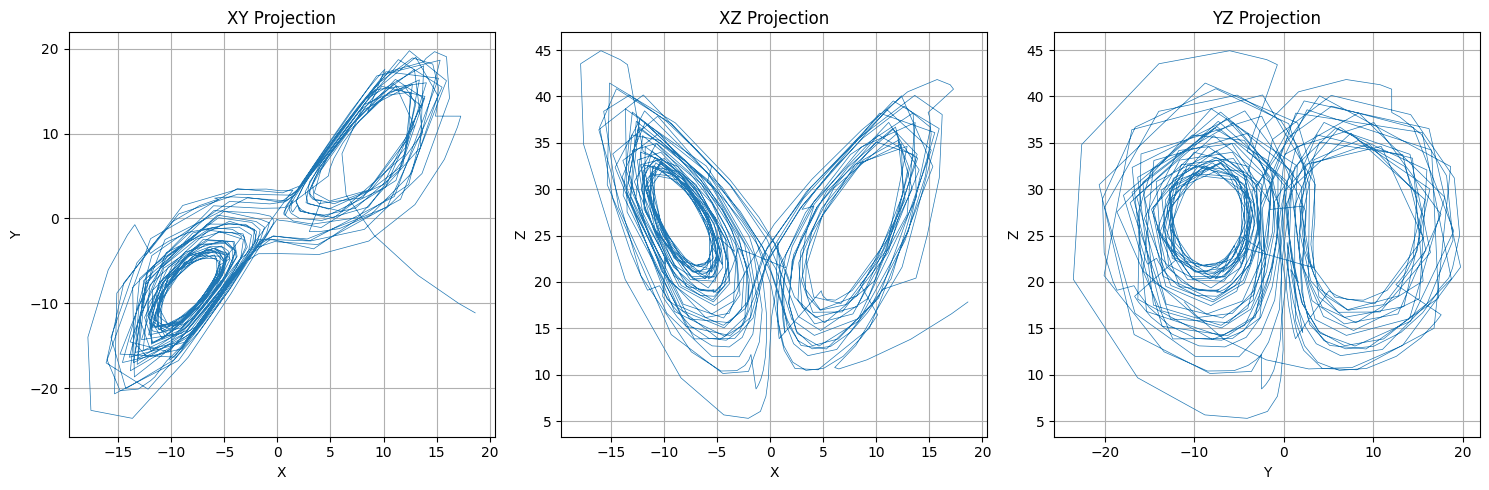

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.integrate import solve_ivp

# Lorenz parameters
sigma, rho, beta = 10.0, 28.0, 8/3
t0, tf = 0.0, 40.0

# Spectral method settings
K = 20  # Number of time intervals
N = 30  # Chebyshev nodes per interval

# Get Chebyshev differentiation matrix and nodes
def cheb(N):
    x = np.cos(np.pi * np.arange(N+1) / N)
    c = np.array([2.] + [1.]*(N-1) + [2.]) * (-1)**np.arange(N+1)
    X = x.reshape(-1, 1)
    dX = X - X.T
    D = (c.reshape(-1, 1) / c) / (dX + np.eye(N+1))
    D -= np.diag(D.sum(axis=1))
    return D, x

# Precompute intervals and global time grid
t_intervals = np.linspace(t0, tf, K+1)
D, x_cheb = cheb(N)  # Chebyshev nodes in [-1, 1]

# Initialize variables for spectral method
total_nodes = K * (N + 1)
U0 = np.zeros(3 * total_nodes)

# Generate initial guess using a coarse ODE solve (Runge-Kutta)
def lorenz(t, u):
    x, y, z = u
    return [sigma*(y - x), x*(rho - z) - y, x*y - beta*z]

sol_ode = solve_ivp(lorenz, [t0, tf], [1.0, 1.0, 1.0], 
                    t_eval=np.linspace(t0, tf, K*(N+1)), rtol=1e-6)
x_guess = sol_ode.y[0].reshape(K, N+1)
y_guess = sol_ode.y[1].reshape(K, N+1)
z_guess = sol_ode.y[2].reshape(K, N+1)

U0[:total_nodes] = x_guess.flatten()
U0[total_nodes:2*total_nodes] = y_guess.flatten()
U0[2*total_nodes:] = z_guess.flatten()

# Residual function for multi-interval spectral collocation
def residuals(U):
    res = np.zeros(3 * total_nodes + 3*(K-1))
    x = U[:total_nodes].reshape(K, N+1)
    y = U[total_nodes:2*total_nodes].reshape(K, N+1)
    z = U[2*total_nodes:].reshape(K, N+1)
    
    # Loop over intervals
    for k in range(K):
        t_interval = t_intervals[k] + (x_cheb + 1) * (t_intervals[k+1] - t_intervals[k])/2
        dt_dtau = 2/(t_intervals[k+1] - t_intervals[k])
        
        # Compute derivatives
        dxdt = dt_dtau * D @ x[k, :]
        dydt = dt_dtau * D @ y[k, :]
        dzdt = dt_dtau * D @ z[k, :]
        
        # Lorenz equations
        res_x = dxdt - sigma*(y[k, :] - x[k, :])
        res_y = dydt - (x[k, :]*(rho - z[k, :]) - y[k, :])
        res_z = dzdt - (x[k, :]*y[k, :] - beta*z[k, :])
        
        # Assign residuals
        offset = k*(N+1)
        res[offset:offset+N+1] = res_x
        res[total_nodes + offset:total_nodes + offset+N+1] = res_y
        res[2*total_nodes + offset:2*total_nodes + offset+N+1] = res_z
        
        # Initial condition (only for first interval)
        if k == 0:
            res[-3*(K-1)-3] = x[0, 0] - 1.0  # x(t0) = 1
            res[-3*(K-1)-2] = y[0, 0] - 1.0  # y(t0) = 1
            res[-3*(K-1)-1] = z[0, 0] - 1.0  # z(t0) = 1
        
        # Continuity between intervals (for k > 0)
        if k < K-1:
            res[-3*(K-1) + 3*k] = x[k, -1] - x[k+1, 0]
            res[-3*(K-1) + 3*k + 1] = y[k, -1] - y[k+1, 0]
            res[-3*(K-1) + 3*k + 2] = z[k, -1] - z[k+1, 0]
    
    return res

# Solve the nonlinear system
sol = least_squares(residuals, U0, verbose=2, max_nfev=50, ftol=1e-6)

# Extract and plot the solution
x_sol = sol.x[:total_nodes]
y_sol = sol.x[total_nodes:2*total_nodes]
z_sol = sol.x[2*total_nodes:]

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(x_sol, y_sol, lw=0.5)
plt.grid()
plt.xlabel("X"); plt.ylabel("Y"); plt.title("XY Projection")

plt.subplot(132)
plt.plot(x_sol, z_sol, lw=0.5)
plt.grid()
plt.xlabel("X"); plt.ylabel("Z"); plt.title("XZ Projection")

plt.subplot(133)
plt.plot(y_sol, z_sol, lw=0.5)
plt.grid()
plt.xlabel("Y"); plt.ylabel("Z"); plt.title("YZ Projection")

plt.tight_layout()
plt.show()

On remarque ainsi que le recourt à la méthode spectrale robuste est une solution pour aboutir à la convergence de la solution dans le cas de notre système chaotique. 

## Résultats et conclusion


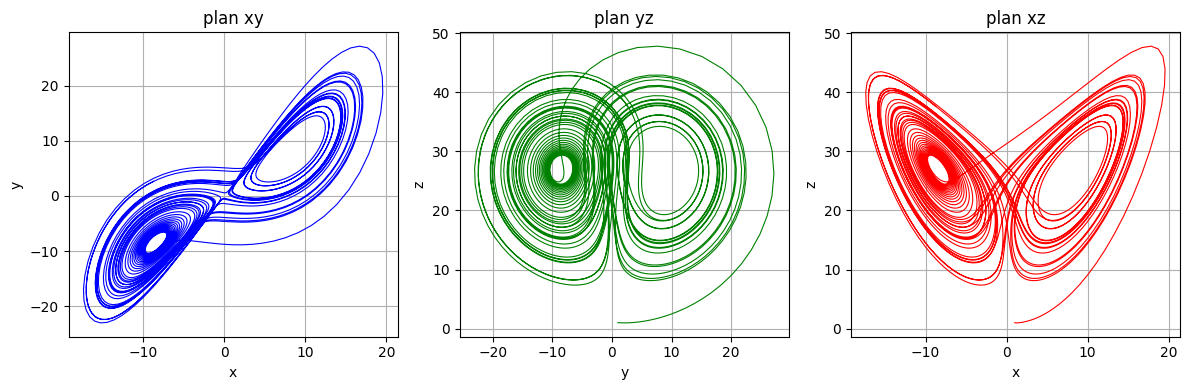
Schéma RK4

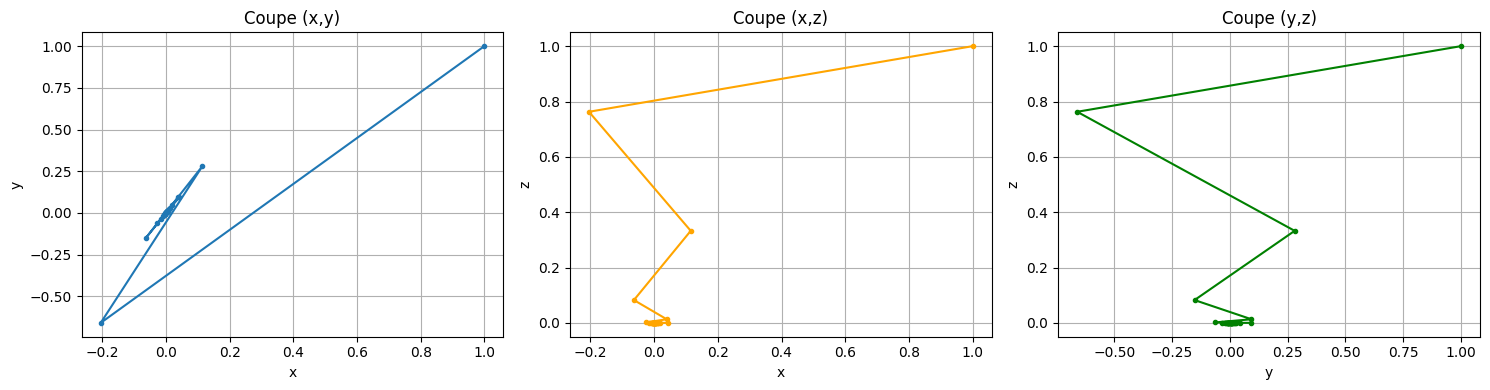
Méthode spectrale

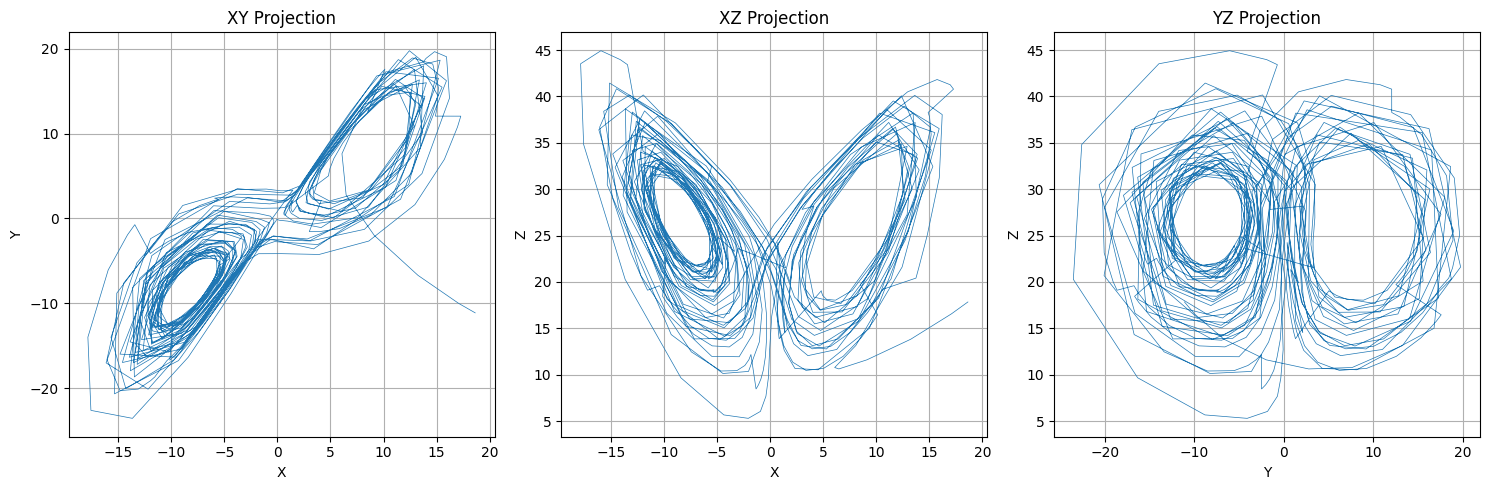
Méthode spectrale robuste

Les figures ci-dessus comparent les trajectoires du système de Lorenz obtenues à l’aide de trois méthodes numériques : le schéma de Runge-Kutta d’ordre 4 (RK4), la méthode spectrale, et enfin la méthode spectrale robuste. 

La première figure illustre les résultats du schéma RK4, qui offre une approximation précise et fluide des trajectoires chaotiques du système. On observe des courbes bien définies et lisses, caractéristiques d’une intégration stable et précise sur une large plage de temps.

En revanche, la méthode spectrale non robuste montre des trajectoires fortement dégradées, avec une propagation significative des erreurs numériques. Les courbes apparaissent irrégulières et moins cohérentes avec la dynamique du système de Lorenz, indiquant un manque de stabilité et une mauvaise gestion des conditions aux limites.

Enfin, en "améliorant" la méthode spectrale (robuste), on réussit à avoir des résultats similaires mais avec une légère dégradation de la régularité des trajectoires, due aux erreurs numériques inhérentes aux polynômes de Chebychev dans la résolution des équations différentielles, ainsi que les erreurs dûes aux troncations dans les fonctions ConvolCheb etc...



En conclusion, le schéma RK4 demeure la solution la plus stable et fiable pour cette simulation, tandis que les méthodes spectrales nécessitent des ajustements pour garantir une meilleure robustesse.

Cependant, la méthode spectrale est en général plus performante sur des problèmes avec des solutions lisses et bien régulières, offrant une précision extrêmement élevée. De plus, comme mentionné à l'introduction, la méthode spectrale est plus adaptée aux PDEs (dérivées spatiales) qu'aux ODEs, et perdent en intérêt lorsqu'il s'agit d'une progression temporelle.